# Name: Nimesh Haldankar


In [121]:
import pandas as pd
import numpy as np

In [122]:
df= pd.read_csv('/content/FastagFraudDetection.csv')

In [123]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


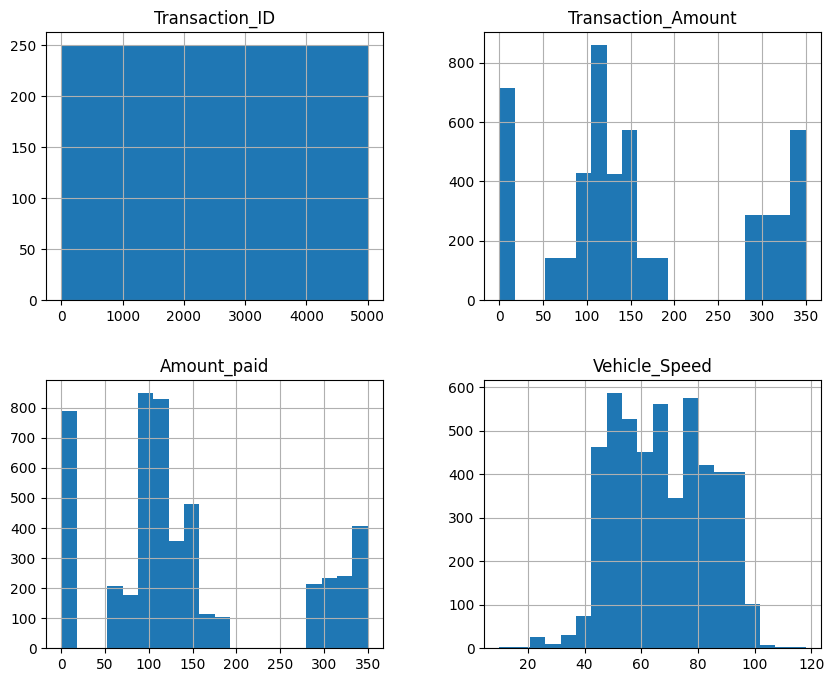

In [124]:
df.hist(figsize=(10,8),bins=20)
plt.show()

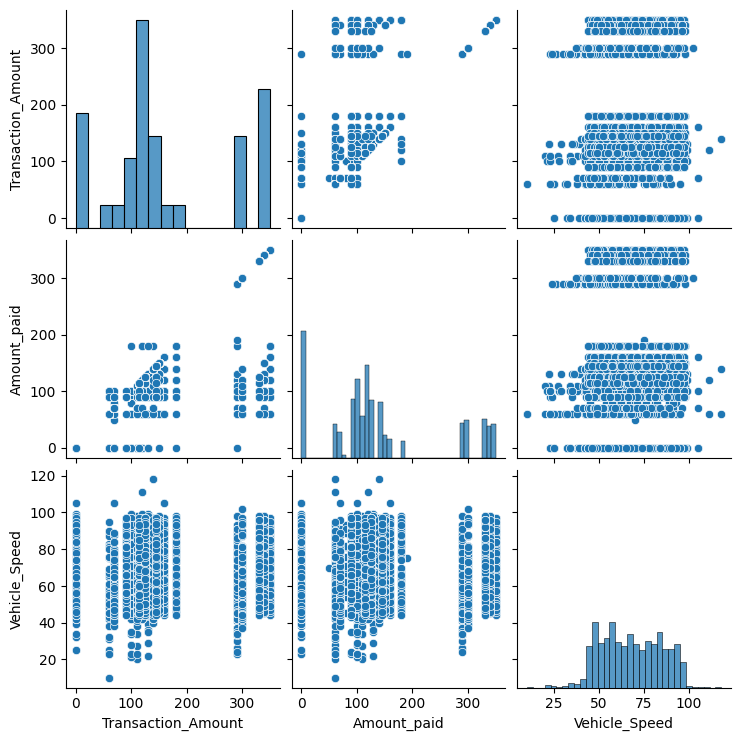

In [125]:
sns.pairplot(df,vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

We will drop columns which do not contribute in our analysis.

In [126]:
df.drop(['Transaction_ID', 'FastagID','Vehicle_Plate_Number'], axis=1, inplace=True)
df.head()

,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud
1,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud
2,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud
3,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud
4,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud


We will seperate Date and Time from Time Stamp column

In [127]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

df = df.drop(columns=['Timestamp'])

df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Date,Time
0,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,2023-01-06,11:20:00
1,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,2023-01-07,14:55:00
2,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,2023-01-08,18:25:00
3,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,2023-01-09,02:05:00
4,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,2023-01-10,06:35:00


We will seperate latitude and longitude from Geographical Location

In [128]:
df[['Latitude', 'Longitude']] = df['Geographical_Location'].str.split(', ', expand=True)
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df = df.drop(columns=['Geographical_Location'])
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Date,Time,Latitude,Longitude
0,Bus,A-101,Express,Large,350,120,65,Fraud,2023-01-06,11:20:00,13.059816,77.770687
1,Car,B-102,Regular,Small,120,100,78,Fraud,2023-01-07,14:55:00,13.059816,77.770687
2,Motorcycle,D-104,Regular,Small,0,0,53,Not Fraud,2023-01-08,18:25:00,13.059816,77.770687
3,Truck,C-103,Regular,Large,350,120,92,Fraud,2023-01-09,02:05:00,13.059816,77.770687
4,Van,B-102,Express,Medium,140,100,60,Fraud,2023-01-10,06:35:00,13.059816,77.770687


In [129]:
import plotly.express as px

fig = px.scatter_geo(df, lat="Latitude", lon="Longitude")
fig.update_layout(
    title="World Map of Latitudes and Longitudes",
    geo=dict(
        showframe=False,
        projection=dict(type="natural earth")  # Change here: wrap 'natural earth' in a dictionary
    )
)
fig.show()

as you can see that the data of fastag is taken from south india.

In [130]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Vehicle_Type'] = le.fit_transform(df['Vehicle_Type'])
df['Lane_Type'] = le.fit_transform(df['Lane_Type'])
df['Vehicle_Dimensions'] = le.fit_transform(df['Vehicle_Dimensions'])
df['TollBoothID']=le.fit_transform(df['TollBoothID'])
df['Date']=le.fit_transform(df['Date'])
df['Time']=le.fit_transform(df['Time'])

df.head()


,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Date,Time,Latitude,Longitude
0,0,0,0,0,350,120,65,Fraud,5,537,13.059816,77.770687
1,1,1,1,2,120,100,78,Fraud,6,701,13.059816,77.770687
2,2,3,1,2,0,0,53,Not Fraud,7,868,13.059816,77.770687
3,5,2,1,0,350,120,92,Fraud,8,100,13.059816,77.770687
4,6,1,0,1,140,100,60,Fraud,9,309,13.059816,77.770687


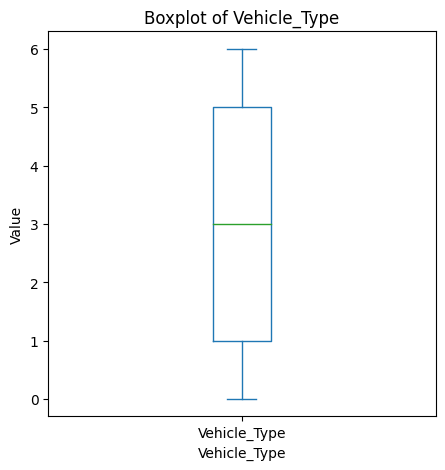

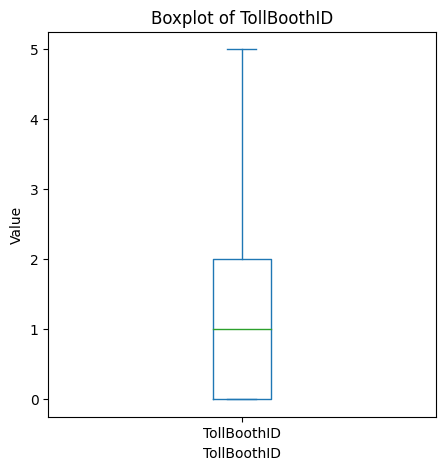

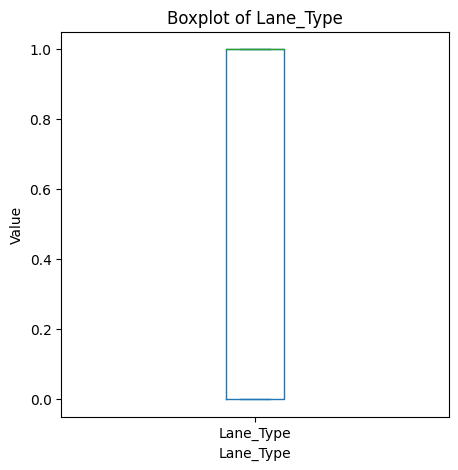

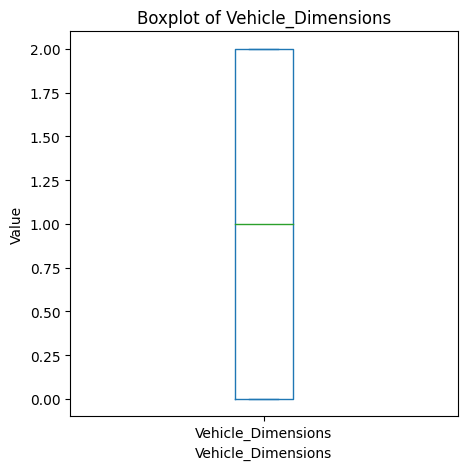

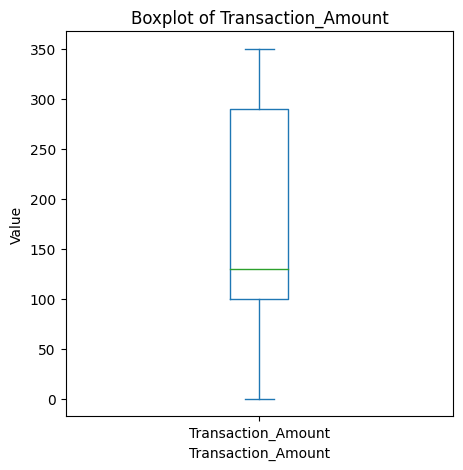

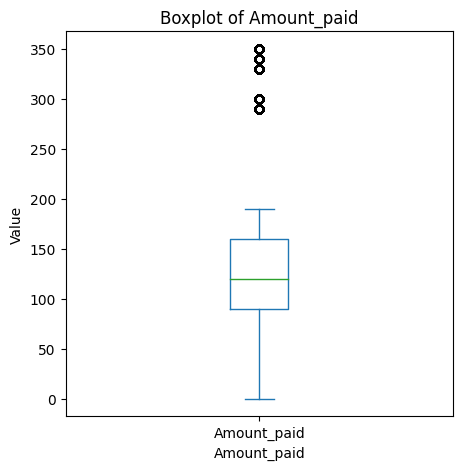

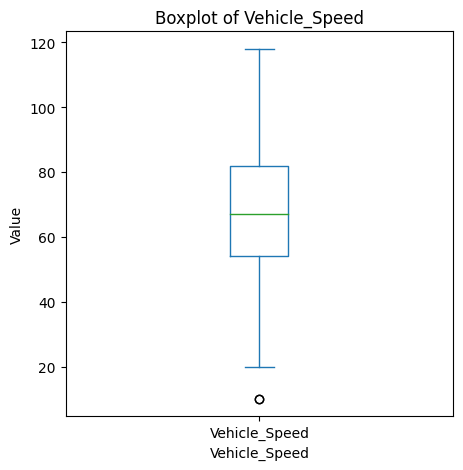

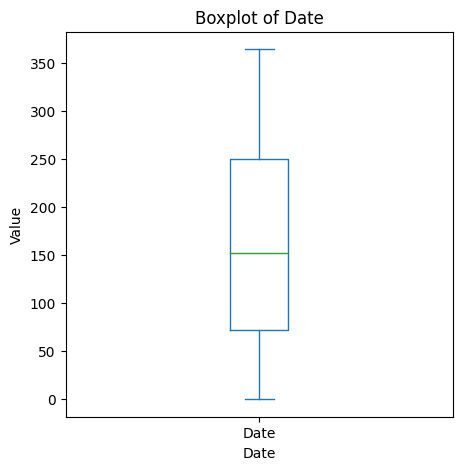

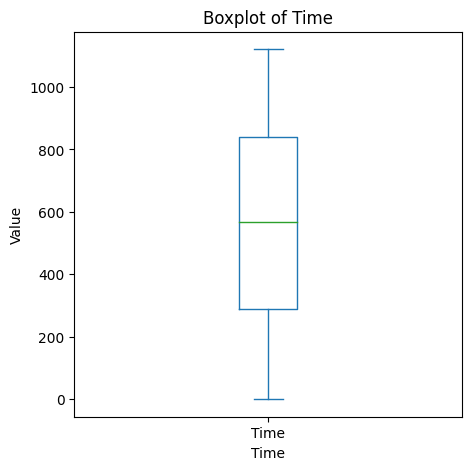

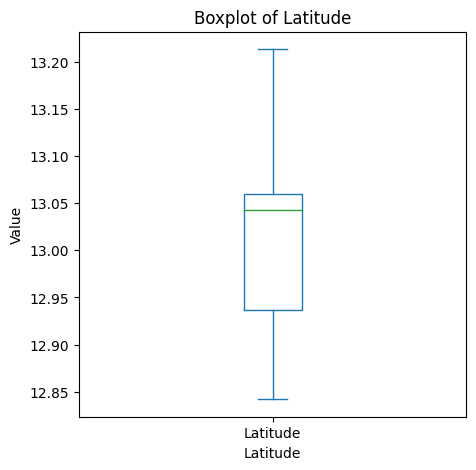

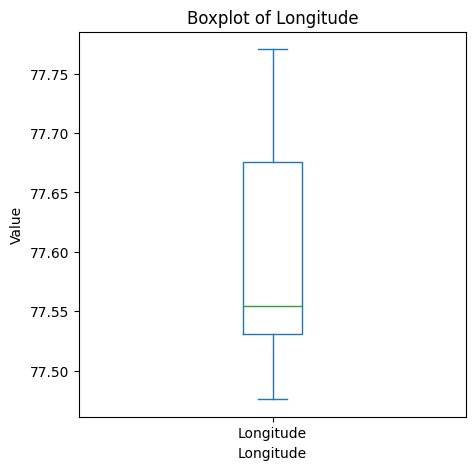

In [131]:

import matplotlib.pyplot as plt

for column in df.columns:
  if column != 'Fraud_indicator':
    plt.figure(figsize=(5, 5))
    df[column].plot.box()
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {column}')
    plt.show()


We have outliers in Vehicle Speed and Amount Paid column so we will first identify and then cap those outliers.

In [132]:

def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

amount_paid_outliers = identify_outliers(df, 'Amount_paid')
vehicle_speed_outliers = identify_outliers(df, 'Vehicle_Speed')

print(f"Amount paid outliers:\n{amount_paid_outliers}")
print(f"Vehicle speed outliers:\n{vehicle_speed_outliers}")


Amount paid outliers:
      Vehicle_Type  TollBoothID  Lane_Type  Vehicle_Dimensions  \
21               0            2          1                   0   
28               0            2          0                   0   
31               5            2          1                   0   
35               0            2          1                   0   
38               5            2          0                   0   
...            ...          ...        ...                 ...   
4981             5            2          1                   0   
4985             0            2          1                   0   
4988             5            2          0                   0   
4992             0            2          0                   0   
4995             5            2          1                   0   

      Transaction_Amount  Amount_paid  Vehicle_Speed Fraud_indicator  Date  \
21                   350          350             90       Not Fraud    26   
28                   350     

In [133]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

df = cap_outliers(df, 'Amount_paid')
df = cap_outliers(df, 'Vehicle_Speed')


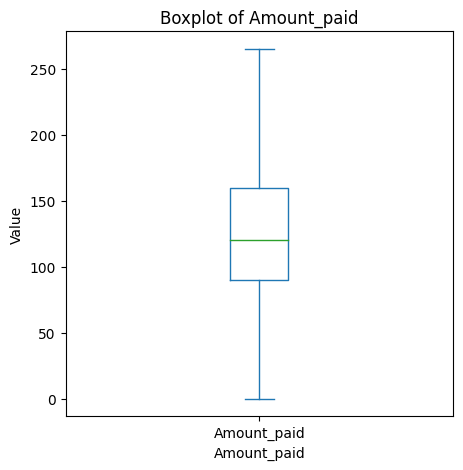

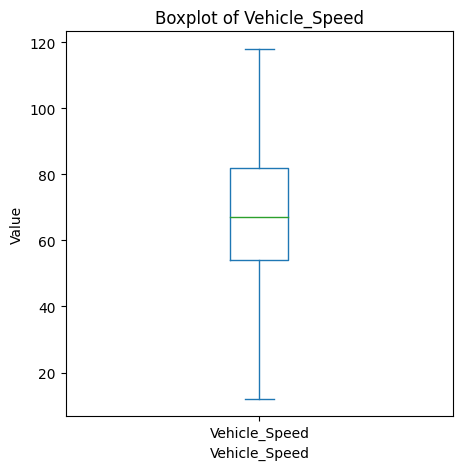

In [134]:

for column in ['Amount_paid', 'Vehicle_Speed']:
  plt.figure(figsize=(5, 5))
  df[column].plot.box()
  plt.xlabel(column)
  plt.ylabel('Value')
  plt.title(f'Boxplot of {column}')
  plt.show()


All the outliers are removed.

We do Standarization of the data

In [135]:

from sklearn.preprocessing import StandardScaler
df_without_fraud = df.drop("Fraud_indicator", axis=1)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_without_fraud)

scaled_df = pd.DataFrame(scaled_df, columns=df_without_fraud.columns)

df = pd.merge(scaled_df, df["Fraud_indicator"], left_index=True, right_index=True)

df.head()


,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Date,Time,Latitude,Longitude,Fraud_indicator
0,-1.499026,-1.005206,-1.155105,-1.028568,1.680364,-0.104160,-0.171878,-1.500632,-0.088014,0.327456,1.58381,Fraud
1,-0.999150,-0.349922,0.865722,1.372384,-0.365195,-0.338017,0.611578,-1.491120,0.425269,0.327456,1.58381,Fraud
2,-0.499275,0.960647,0.865722,1.372384,-1.432443,-1.507304,-0.895068,-1.481609,0.947942,0.327456,1.58381,Not Fraud
3,1.000350,0.305363,0.865722,-1.028568,1.680364,-0.104160,1.455300,-1.472098,-1.455728,0.327456,1.58381,Fraud
4,1.500225,-0.349922,-1.155105,0.171908,-0.187320,-0.338017,-0.473207,-1.462586,-0.801604,0.327456,1.58381,Fraud


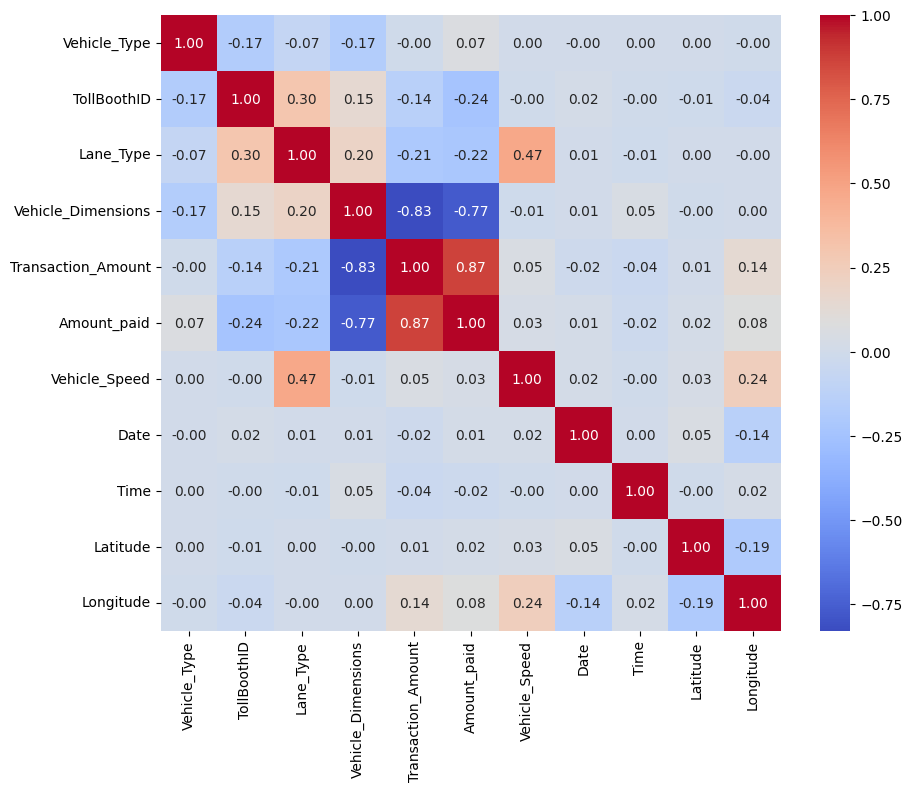

In [136]:

df_without_fraud = df.drop("Fraud_indicator", axis=1)

correlation_matrix = df_without_fraud.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


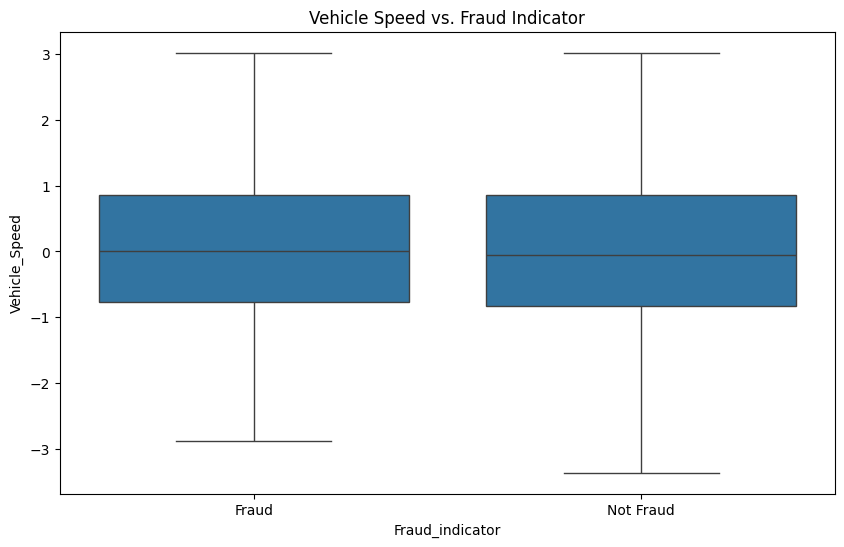

In [137]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=df)
plt.title('Vehicle Speed vs. Fraud Indicator')
plt.show()


<Axes: xlabel='count', ylabel='Fraud_indicator'>

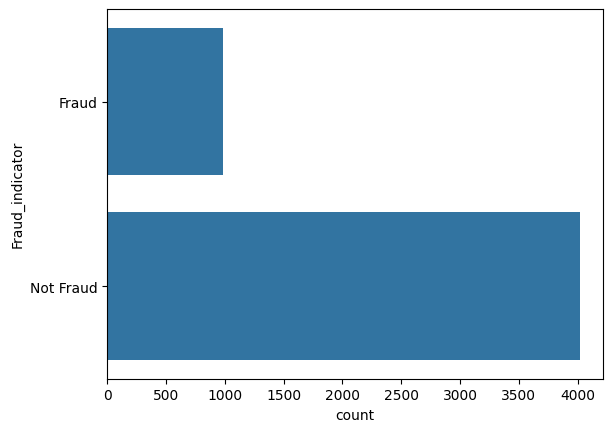

In [138]:
import seaborn as sns
sns.countplot(df['Fraud_indicator'])

We can see that Not Fraud is way more than Fraud Therefore we need to apply SMOTE but before that we will split the Data Into train Test.

In [139]:
X = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']


In [140]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [141]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=62)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<Axes: xlabel='count', ylabel='Fraud_indicator'>

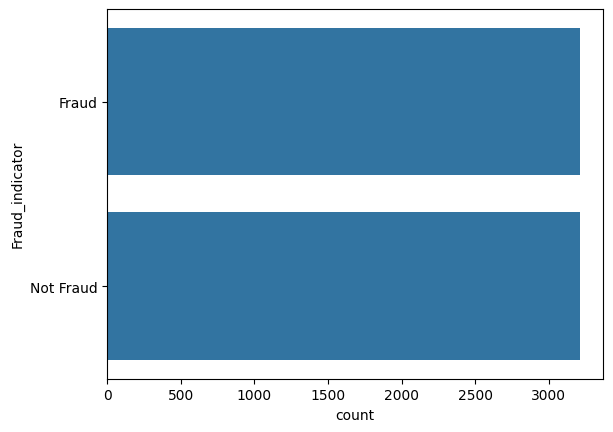

In [142]:
sns.countplot(y_train_smote)

Now we can see that the target variabe is balanced and we can proceed further.

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
model_logistic = LogisticRegression(random_state=34)
model_logistic.fit(X_train_smote, y_train_smote)
y_pred_logistic = model_logistic.predict(X_test)

# Decision Tree
model_tree = DecisionTreeClassifier(random_state=34)
model_tree.fit(X_train_smote, y_train_smote)
y_pred_tree = model_tree.predict(X_test)

# Random Forest
model_forest = RandomForestClassifier(random_state=34)
model_forest.fit(X_train_smote, y_train_smote)
y_pred_forest = model_forest.predict(X_test)

# Print results
print("Logistic Regression:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nAccuracy:", accuracy_score(y_test, y_pred_logistic))

print("\nDecision Tree:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))
print("\nAccuracy:", accuracy_score(y_test, y_pred_tree))

print("\nRandom Forest:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))
print("\nAccuracy:", accuracy_score(y_test, y_pred_forest))


Logistic Regression:
Confusion Matrix:
 [[179  13]
 [  0 808]]

Classification Report:
               precision    recall  f1-score   support

       Fraud       1.00      0.93      0.96       192
   Not Fraud       0.98      1.00      0.99       808

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000


Accuracy: 0.987

Decision Tree:
Confusion Matrix:
 [[192   0]
 [  0 808]]

Classification Report:
               precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00       192
   Not Fraud       1.00      1.00      1.00       808

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Accuracy: 1.0

Random Forest:
Confusion Matrix:
 [[189   3]
 [  0 808]]

Classification Report:
               precision    recall  f1-score   support

     

As you can see that Decision tree is giving the most accurate and precise results.

We can find importance of the features using random forest as well.

In [144]:

importances = model_forest.feature_importances_
features = X_train_smote.columns

importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)

print(importance_df)

               feature  importance
5          Amount_paid    0.533851
4   Transaction_Amount    0.156960
1          TollBoothID    0.090572
3   Vehicle_Dimensions    0.051121
0         Vehicle_Type    0.034160
10           Longitude    0.029839
7                 Date    0.028107
8                 Time    0.027431
6        Vehicle_Speed    0.025100
9             Latitude    0.018212
2            Lane_Type    0.004648


So Amount_paid is the most important feature for our analysis